# Machine Learning - Supervised Learning (Classification)

## Decision Trees

#### Author: Sarthak Singh 


Stepwise Method:

1. Preapare X (Input) and Y (output)

Initially we have a dataset by which we can prepare a model 
and that model should be capable in classifying the flower into correct group 

2. Import machine learning algorithm 

We need to choose which machine learning algorithm should we use in the preparation of this model 

3. Train the Machine Learning model - fit 

Training the machine learning model using a method known as model.fit()

4. Score - Accuracy

model.score - used to check the accuracy of the model.

5. Predict 

after validation, model is now ready to predict base on the new input given 


In [47]:
#Importing the necessary data libraries 

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style="white", color_codes = True)
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [48]:
#dataframe

iris = pd.read_csv("E:\Documents E\Datasets\Iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
# count

iris["Species"].value_counts()

# the data is not biased all species have equal counts and all are of type integer

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Decision Tree Algorithm

In [50]:
# computer a machine dosen't undersatnd words, so we will give the groups a number using a dictionary

# iris-setosa will be class 0
# iris-versicolor will be class 1
# iris-virginica will be class 2

flower_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica' : 2}
iris["Species"] = iris["Species"].map(flower_mapping)


In [51]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Step 1: Preparing inputs and outputs (X,y)

Note that X is a d dimensional vector as studied in Machine learning Foundations (MLF)
and y is the output (here this output will specify the class) it belongs to the real number set 

In [52]:
# input X a d-dimensional vector 
# Note that the .values at last specifies that we need the values of the 4 columns

X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values


# Output y is a label

y = iris[["Species"]].values

## Step 2: Import the Decision Tree Algorithm from scikit-learn

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# initializing the model

model = DecisionTreeClassifier()

## Step 3: Train the Machine Learning Model model.fit(X,y)

In [55]:
model.fit(X, y)

DecisionTreeClassifier()

### Step 4: Score - Accuracy of the Model 

In [56]:
model.score(X,y)

1.0

## Step 5: Make Predictions

In [57]:
expected = y
predicted = model.predict(X)  # same input used for prediction that was used for training 

predicted 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Summarize the fit of the model


In [58]:
from sklearn import metrics

In [59]:
print(metrics.classification_report(expected, predicted))

# for Iris-setosa class 0 we have precision 1 that is 100% and that was seen even by looking at the data 

# f1 score is the average of precision and recall
# it is a better measure of accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150




# Confusion matrix 

In [60]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


## Graphical plot

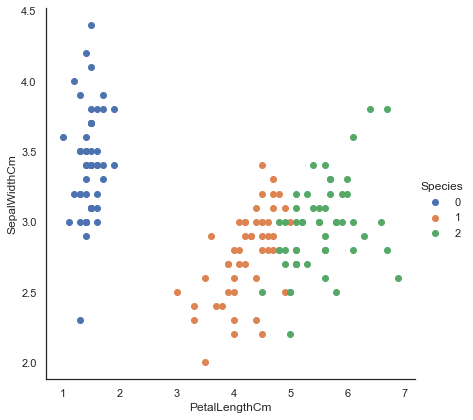

In [61]:
# Data visualisation for better understanding of data 

sns.FacetGrid(iris, hue = "Species", height = 6).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()


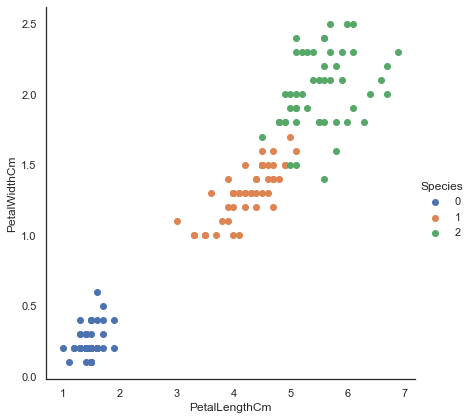

In [62]:
# Data visualisation for better understanding of data 

sns.FacetGrid(iris, hue = "Species", height = 6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()


We can see that the blue points (Iris-setosa) are separated from the other 2 groups 
and the Iris-versicolor (Orange) and Iris-virginica (Green) are little-mixed, but can be separarted by a line 
and there will be some outliers too.

so, for setosa (blue points) we should get 100% accuracy as there is no mixing with other types